In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt # charts and graphs
import seaborn as sns # styling & pretty colors
import shutil
import tensorflow as tf

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

In [2]:
df = pd.read_csv('/Users/taylorlast/Coding/Python/Golf_Analysis/ASA All PGA Raw Data - Tourn Level.csv')
df

,player,tournament id,Player_initial_last,player id,DK_Hole_FP,DK_Streak_Bonus_FP,FD_Hole_FP,FD_Streak_Bonus_FP,tournament name,season,...,date,Finish,Score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,place
0,Aaron Baddeley,2232,A. Baddeley,16,70.0,6,66.2,21.1,Waste Management Phoenix Open,2015,...,2015-02-01,T17,-8,1.73,0.10,0.32,-0.62,-0.20,1.53,17
1,Aaron Baddeley,2233,A. Baddeley,16,67.0,0,64.1,20.8,AT&T Pebble Beach Pro-Am,2015,...,2015-02-15,T54,-7,1.82,0.58,-2.26,-0.51,-2.19,-0.37,54
2,Aaron Baddeley,2234,A. Baddeley,16,27.0,0,20.9,10.6,Farmers Insurance Open,2015,...,2015-02-08,CUT,3,-0.35,-0.62,-1.95,0.57,-1.99,-2.34,-
3,Aaron Baddeley,2236,A. Baddeley,16,27.0,0,18.5,5.6,Northern Trust Open,2015,...,2015-02-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-
4,Aaron Baddeley,2240,A. Baddeley,16,23.5,0,14.5,10.0,The Players Championship,2015,...,2015-05-10,CUT,11,1.73,-0.46,-5.50,-1.00,-6.96,-5.23,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25341,Zecheng Dou,401025260,Z. Dou,8889,30.5,0,26.4,4.6,RBC Canadian Open,2018,...,2018-07-29,CUT,1,-0.47,-1.21,-0.08,-0.13,-1.43,-1.90,-
25342,Zecheng Dou,401025264,Z. Dou,8889,32.0,0,29.8,0.6,Wyndham Championship,2018,...,2018-08-29,CUT,-2,-0.73,-0.03,-0.28,1.24,0.92,0.19,-
25343,Zecheng Dou,401025271,Z. Dou,8889,10.5,0,2.9,10.0,Barbasol Championship,2018,...,2018-07-23,W/D,7,-2.22,-2.50,-1.69,-2.28,-6.46,-8.68,-
25344,Zecheng Dou,401148241,Z. Dou,8889,61.5,0,44.7,30.6,WGC-HSBC Champions,2020,...,2019-11-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67


In [3]:
#Convert date
from datetime import datetime
for date in df['date']:
    df['date'] = datetime.strptime(date,'%Y-%m-%d')

In [17]:
tournament_name = 'PGA Championship'
this_week = df[df['tournament name'].str.contains(tournament_name)]
this_week

,player,tournament id,Player_initial_last,player id,DK_Hole_FP,DK_Streak_Bonus_FP,FD_Hole_FP,FD_Streak_Bonus_FP,tournament name,season,...,date,Finish,Score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,place
37,Aaron Baddeley,2507,A. Baddeley,16,55.0,0,50.7,19.6,PGA Championship,2016,...,2019-11-03,T49,-1,0.12,0.24,0.13,0.16,0.53,0.66,49
150,Aaron Wise,401025263,A. Wise,10577,23.5,0,18.1,10.6,PGA Championship,2018,...,2019-11-03,CUT,4,-1.33,-0.75,-0.72,1.29,-0.18,-1.51,-
169,Aaron Wise,401056552,A. Wise,10577,42.5,0,35.4,5.6,PGA Championship,2019,...,2019-11-03,T41,7,-0.26,0.24,0.16,0.74,1.14,0.88,41
249,Abraham Ancer,401056552,A. Ancer,9261,51.5,3,44.2,6.2,PGA Championship,2019,...,2019-11-03,T16,3,0.89,0.60,0.00,0.38,0.99,1.88,16
360,Adam Hadwin,401025263,A. Hadwin,5548,22.5,0,19.0,0.6,PGA Championship,2018,...,2019-11-03,CUT,3,-1.72,0.98,-0.58,0.31,0.70,-1.01,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,Zach Johnson,2255,Z. Johnson,686,25.5,3,21.2,21.2,PGA Championship,2015,...,2019-11-03,CUT,3,0.71,1.06,0.03,-1.76,-0.67,0.04,-
25183,Zach Johnson,2507,Z. Johnson,686,58.5,0,54.8,10.2,PGA Championship,2016,...,2019-11-03,T33,-3,0.60,-0.19,1.15,-0.40,0.55,1.16,33
25229,Zach Johnson,401025263,Z. Johnson,686,70.0,0,66.3,19.8,PGA Championship,2018,...,2019-11-03,CUT,5,-0.30,0.27,-1.37,-0.60,-1.71,-2.01,19
25230,Zach Johnson,401025263,Z. Johnson,686,70.0,0,66.3,19.8,PGA Championship,2018,...,2019-11-03,T19,-7,1.42,0.19,0.26,-0.17,0.28,1.70,19


In [18]:
this_week['FD_Points']= this_week['FD_Hole_FP'] + this_week['FD_Streak_Bonus_FP']
this_week

<ipython-input-18-2dd766d40e73>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_week['FD_Points']= this_week['FD_Hole_FP'] + this_week['FD_Streak_Bonus_FP']


,player,tournament id,Player_initial_last,player id,DK_Hole_FP,DK_Streak_Bonus_FP,FD_Hole_FP,FD_Streak_Bonus_FP,tournament name,season,...,Finish,Score,sg_putt,sg_arg,sg_app,sg_ott,sg_t2g,sg_total,place,FD_Points
37,Aaron Baddeley,2507,A. Baddeley,16,55.0,0,50.7,19.6,PGA Championship,2016,...,T49,-1,0.12,0.24,0.13,0.16,0.53,0.66,49,70.3
150,Aaron Wise,401025263,A. Wise,10577,23.5,0,18.1,10.6,PGA Championship,2018,...,CUT,4,-1.33,-0.75,-0.72,1.29,-0.18,-1.51,-,28.7
169,Aaron Wise,401056552,A. Wise,10577,42.5,0,35.4,5.6,PGA Championship,2019,...,T41,7,-0.26,0.24,0.16,0.74,1.14,0.88,41,41.0
249,Abraham Ancer,401056552,A. Ancer,9261,51.5,3,44.2,6.2,PGA Championship,2019,...,T16,3,0.89,0.60,0.00,0.38,0.99,1.88,16,50.4
360,Adam Hadwin,401025263,A. Hadwin,5548,22.5,0,19.0,0.6,PGA Championship,2018,...,CUT,3,-1.72,0.98,-0.58,0.31,0.70,-1.01,-,19.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25161,Zach Johnson,2255,Z. Johnson,686,25.5,3,21.2,21.2,PGA Championship,2015,...,CUT,3,0.71,1.06,0.03,-1.76,-0.67,0.04,-,42.4
25183,Zach Johnson,2507,Z. Johnson,686,58.5,0,54.8,10.2,PGA Championship,2016,...,T33,-3,0.60,-0.19,1.15,-0.40,0.55,1.16,33,65.0
25229,Zach Johnson,401025263,Z. Johnson,686,70.0,0,66.3,19.8,PGA Championship,2018,...,CUT,5,-0.30,0.27,-1.37,-0.60,-1.71,-2.01,19,86.1
25230,Zach Johnson,401025263,Z. Johnson,686,70.0,0,66.3,19.8,PGA Championship,2018,...,T19,-7,1.42,0.19,0.26,-0.17,0.28,1.70,19,86.1


In [19]:
#check for na
this_week = this_week.drop(this_week.loc[this_week['sg_putt'].isna()==True].index)
this_week.isna().sum()

player                   0
tournament id            0
Player_initial_last      0
player id                0
DK_Hole_FP               0
DK_Streak_Bonus_FP       0
FD_Hole_FP               0
FD_Streak_Bonus_FP       0
tournament name          0
season                   0
final position         172
DK_Finish_FP             0
FD_Finish_FP             0
DK_Total_FP              0
FD_Total_FP              0
major                    0
made_cut                 0
course                   0
date                     0
Finish                   0
Score                    0
sg_putt                  0
sg_arg                   0
sg_app                   0
sg_ott                   0
sg_t2g                   0
sg_total                 0
place                   10
FD_Points                0
dtype: int64

In [20]:
#Evaluate Multicollinearity

sg_columns = ['FD_Points','sg_putt','sg_arg','sg_app','sg_ott','sg_t2g','sg_total']
sg_df = this_week[sg_columns]
corr = sg_df.corr()
sns.heatmap(corr, cmap='RdBu')
corr

X1 = sm.tools.add_constant(sg_df)
series_sg = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
display(series_sg)

sg_df_after = sg_df.drop(['sg_total','sg_t2g'],axis=1)
X2 = sm.tools.add_constant(sg_df_after)
series_sg_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)
print('-'*50)
display(series_sg_after)

const            10.492972
FD_Points         3.185957
sg_putt       41761.615618
sg_arg        14591.096124
sg_app        33645.560395
sg_ott        15973.248184
sg_t2g       116285.364083
sg_total     123524.328352
dtype: float64

--------------------------------------------------


const        10.408090
FD_Points     3.182324
sg_putt       2.056155
sg_arg        1.237167
sg_app        1.683120
sg_ott        1.310670
dtype: float64

LinearRegression()

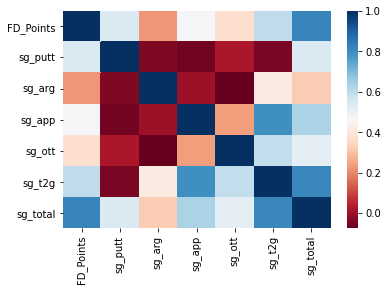

In [21]:
#Fit model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

reg = LinearRegression()

x = sg_df_after.drop('FD_Points',axis=1)
y = sg_df_after[['FD_Points']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

reg.fit(X_train,y_train)

In [22]:
intercept = reg.intercept_[0]
coefficent = reg.coef_[0][0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(x.columns, reg.coef_[0]):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is 49.65
----------------------------------------------------------------------------------------------------
The Coefficient for sg_putt is 1.6e+01
The Coefficient for sg_arg is 1.1e+01
The Coefficient for sg_app is 1.2e+01
The Coefficient for sg_ott is 1.2e+01


In [23]:
y_predict = reg.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model_mse = mean_squared_error(y_test,y_predict)
model_mse
r2 = r2_score(y_test,y_predict)
r2

0.7166738552264448

In [25]:
X2 = sm.add_constant(x)

# create a OLS model
model = sm.OLS(y, X2)

# fit the data
est = model.fit()

In [26]:
est.conf_int()

,0,1
const,48.058271,51.065827
sg_putt,14.273772,17.089436
sg_arg,9.174628,13.537358
sg_app,10.781690,13.735645
sg_ott,8.994250,13.286509


In [27]:
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              FD_Points   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     250.4
Date:                Tue, 04 Aug 2020   Prob (F-statistic):          6.60e-114
Time:                        11:56:30   Log-Likelihood:                -1950.1
No. Observations:                 464   AIC:                             3910.
Df Residuals:                     459   BIC:                             3931.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.5620      0.765     64.768      0.0

The mean of the residuals is -1.508e-14


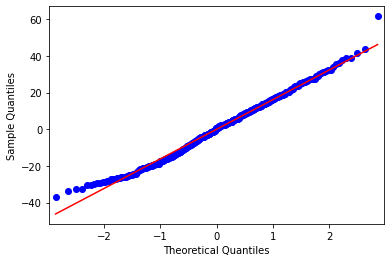

In [28]:
sm.qqplot(est.resid, line='s')
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

In [60]:
#Match it to predict SG for the year
golf_data_2020 = pd.read_csv('/Users/taylorlast/Coding/Python/Golf_Analysis/2020_data.csv')
golf_data_2020 = golf_data_2020[golf_data_2020['variable'] != 'RANK THIS WEEK']
golf_data_2020['stat'] = golf_data_2020['statistic'] + " (" + golf_data_2020['variable'] + ")"
golf_data_2020 = golf_data_2020.drop(columns = ['variable','statistic'])

golf_data_2020 = golf_data_2020.set_index(['tournament','player_name','stat','date'])['value'].unstack('stat').reset_index()

sg_columns_2020 = ['player_name','tournament','date','SG: Approach the Green (AVERAGE)','SG: Around-the-Green (AVERAGE)','SG: Off-the-Tee (AVERAGE)',
             'SG: Putting (AVERAGE)']
golf_data_2020 = golf_data_2020[sg_columns_2020]
golf_data_2020 = golf_data_2020.dropna()
golf_data_2020 = golf_data_2020.rename(columns = {'SG: Approach the Green (AVERAGE)':'sg_app','SG: Around-the-Green (AVERAGE)':'sg_arg',
                       'SG: Off-the-Tee (AVERAGE)': 'sg_ott','SG: Putting (AVERAGE)': 'sg_putt'})
golf_data_2020 = golf_data_2020.drop(['tournament','date'],axis = 1)
golf_data_2020[['sg_app','sg_arg','sg_ott','sg_putt']] = golf_data_2020[['sg_app','sg_arg','sg_ott','sg_putt']].astype(float)
golf_data_2020.groupby('player_name').mean()

#Predict using sg for this year
golf_data_2020['predicted_FD_Points'] = reg.predict(golf_data_2020[['sg_app','sg_arg','sg_ott','sg_putt']])
golf_data_2020 = golf_data_2020.sort_values('predicted_FD_Points', ascending = False)
golf_data_2020

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


stat,player_name,sg_app,sg_arg,sg_ott,sg_putt,predicted_FD_Points
1186,Abraham Ancer,1.759,0.872,0.693,2.379,123.062053
101,Kevin Streelman,2.195,0.084,1.094,1.821,119.214755
1213,Grayson Murray,1.220,1.732,1.080,1.497,118.880280
1246,Sepp Straka,2.811,-0.592,0.918,1.752,118.210079
1192,Ben Martin,2.127,0.434,0.555,1.773,115.126854
...,...,...,...,...,...,...
367,Dominic Bozzelli,-1.486,-0.178,-0.425,-2.090,-4.981195
120,Ryan Brehm,-1.016,-0.202,-2.251,-0.838,-5.300338
1225,Matt Every,-3.273,0.172,0.776,-1.786,-11.001657
954,Martin Trainer,-1.962,-0.982,-0.349,-1.978,-19.415537


In [61]:
pga_field = ['Byeong Hun An',
'Abraham Ancer',
'Mike Auterson',
'Danny Balin',
'Alex Beach',
'Rich Beem',
'Rich Berberian Jr.',
'Daniel Berger',
'Justin Bertsch',
'Christiaan Bezuidenhout',
'Keegan Bradley',
'Rafa Cabrera Bello',
'Jorge Campillo',
'Patrick Cantlay',
'Jason Caron',
'Paul Casey',
'Bud Cauley',
'Cameron Champ',
'Wyndham Clark',
'Corey Conners',
'Benny Cook',
'Joel Dahmen',
'Jason Day',
'Bryson DeChambeau',
'Jason Dufner',
'Tyler Duncan',
'Harris English',
'Tony Finau',
'Matt Fitzpatrick',
'Tommy Fleetwood',
'Rickie Fowler',
'Dylan Frittelli',
'Jim Furyk',
'Sergio Garcia',
'Judd Gibb',
'Lucas Glover',
'Taylor Gooch',
'Branden Grace',
'Lanto Griffin',
'Emiliano Grillo',
'Adam Hadwin',
'Brian Harman',
'Jeff Hart',
'Tyrrell Hatton',
'Benjamin Hebert',
'Russell Henley',
'Lucas Herbert',
'Jim Herman',
'Tom Hoge',
'J.B. Holmes',
'Max Homa',
'Billy Horschel',
'Viktor Hovland',
'Mark Hubbard',
'Mackenzie Hughes',
'Sungjae Im',
'Ryo Ishikawa',
'Jazz Janewattananond',
'Marty Jertson',
'Dustin Johnson',
'Zach Johnson',
'Zach. J. Johnson',
'Matt Jones',
'Sung Kang',
'Martin Kaymer',
'Chan Kim',
'Joohyung Kim',
'Si Woo Kim',
'Marcus Kinhult',
'Kevin Kisner',
'Kurt Kitayama',
'Alex Knoll',
'Brooks Koepka',
'Jason Kokrak',
'Matt Kuchar',
'Rob Labritz',
'Andrew Landry',
'Nate Lashley',
'Danny Lee',
'Marc Leishman',
'Tom Lewis',
'Haotong Li',
'Luke List',
'Adam Long',
'Mike Lorenzo-Vera',
'Davis Love III',
'Shane Lowry',
'Joost Luiten',
'Robert MacIntyre',
'Hideki Matsuyama',
'Denny McCarthy',
'Graeme McDowell',
'Rory McIlroy',
'Troy Merritt',
'Shaun Micheel',
'Phil Mickelson',
'Keith Mitchell',
'Collin Morikawa',
'Sebastián Muñoz',
'David Muttitt',
'Kevin Na',
'Joaquin Niemann',
'Shaun Norris',
'John O’Leary',
'Louis Oosthuizen',
'Carlos Ortiz',
'Ryan Palmer',
'C.T. Pan',
'Victor Perez',
'Rod Perry',
'Scott Piercy',
'J.T. Poston',
'Ian Poulter',
'Andrew Putnam',
'Jon Rahm',
'Chez Reavie',
'Doc Redman',
'Patrick Reed',
'Justin Rose',
'J.R. Roth',
'Rory Sabbatini',
'Xander Schauffele',
'Scottie Scheffler',
'Matthias Schwab',
'Charl Schwartzel',
'Adam Scott',
'Webb Simpson',
'Cameron Smith',
'Brandt Snedeker',
'Bob Sowards',
'Jordan Spieth',
'Brendan Steele',
'Henrik Stenson',
'Sepp Straka',
'Kevin Streelman',
'Steve Stricker',
'Brian Stuard',
'Ken Tanigawa',
'Nick Taylor',
'Vaughn Taylor',
'Justin Thomas',
'Michael Thompson',
'Brendon Todd',
'Cameron Tringale',
'Erik van Rooyen',
'Harold Varner III',
'Ryan Vermeer',
'Jimmy Walker',
'Matt Wallace',
'Shawn Warren',
'Bubba Watson',
'Richy Werenski',
'Bernd Wiesberger',
'Danny Willett',
'Matthew Wolff',
'Gary Woodland',
'Tiger Woods',
'Xinjun Zhang']
pga_field

['Byeong Hun An',
 'Abraham Ancer',
 'Mike Auterson',
 'Danny Balin',
 'Alex Beach',
 'Rich Beem',
 'Rich Berberian Jr.',
 'Daniel Berger',
 'Justin Bertsch',
 'Christiaan Bezuidenhout',
 'Keegan Bradley',
 'Rafa Cabrera Bello',
 'Jorge Campillo',
 'Patrick Cantlay',
 'Jason Caron',
 'Paul Casey',
 'Bud Cauley',
 'Cameron Champ',
 'Wyndham Clark',
 'Corey Conners',
 'Benny Cook',
 'Joel Dahmen',
 'Jason Day',
 'Bryson DeChambeau',
 'Jason Dufner',
 'Tyler Duncan',
 'Harris English',
 'Tony Finau',
 'Matt Fitzpatrick',
 'Tommy Fleetwood',
 'Rickie Fowler',
 'Dylan Frittelli',
 'Jim Furyk',
 'Sergio Garcia',
 'Judd Gibb',
 'Lucas Glover',
 'Taylor Gooch',
 'Branden Grace',
 'Lanto Griffin',
 'Emiliano Grillo',
 'Adam Hadwin',
 'Brian Harman',
 'Jeff Hart',
 'Tyrrell Hatton',
 'Benjamin Hebert',
 'Russell Henley',
 'Lucas Herbert',
 'Jim Herman',
 'Tom Hoge',
 'J.B. Holmes',
 'Max Homa',
 'Billy Horschel',
 'Viktor Hovland',
 'Mark Hubbard',
 'Mackenzie Hughes',
 'Sungjae Im',
 'Ryo Ishik

In [62]:
golf_data_2020[golf_data_2020['player_name'].isin(pga_field)]

stat,player_name,sg_app,sg_arg,sg_ott,sg_putt,predicted_FD_Points
1186,Abraham Ancer,1.759,0.872,0.693,2.379,123.062053
101,Kevin Streelman,2.195,0.084,1.094,1.821,119.214755
1246,Sepp Straka,2.811,-0.592,0.918,1.752,118.210079
1624,Collin Morikawa,2.303,0.014,0.885,1.182,110.184727
114,Nick Taylor,1.263,0.836,-0.264,2.946,109.975389
...,...,...,...,...,...,...
1806,Ryo Ishikawa,-1.236,0.597,-0.544,-2.314,3.769463
116,Paul Casey,-0.516,-0.782,0.397,-2.904,3.718126
1775,Graeme McDowell,-0.827,-0.839,-1.083,-0.998,2.536997
1814,Sung Kang,0.358,-1.154,-0.179,-3.272,1.958987
